In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Lab2')


Исходный набор данных WBC представляет собой набор данных для классификации, в котором записываются измерения для случаев рака молочной железы. Он состоит из двух классов: 357 нормальных примеров (доброкачественные) и 21 аномальных примеров (злокачественные).

### Задание 1

In [ ]:
import numpy as np
import lab02_lib as lib

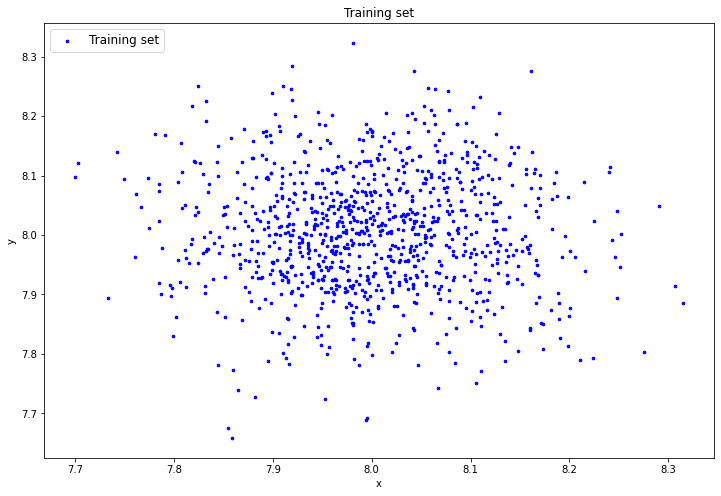

In [ ]:
# генерация датасета
data = lib.datagen(8, 8, 1000, 2)

In [ ]:
# вывод данных и размерности
print('Исходные данные:')
print(data)
print('Размерность данных:')
print(data.shape)

Исходные данные:
[[7.93883251 7.99991371]
 [7.97931102 7.86106614]
 [8.19970567 7.8645423 ]
 ...
 [8.11645002 7.89107885]
 [7.99503688 8.00815658]
 [8.07662754 8.08006072]]
Размерность данных:
(1000, 2)


In [ ]:
# обучение AE1
patience = 300
ae1_trained, IRE1, IREth1 = lib.create_fit_save_ae(
    data,'out/AE1.h5','out/AE1_ire_th.txt', 1000, True, patience)

Задать архитектуру автокодировщиков или использовать архитектуру по умолчанию? (1/2): 1
Задайте количество скрытых слоёв (нечетное число) : 1
Задайте архитектуру скрытых слоёв автокодировщика, например, в виде 3 1 3 : 1
Epoch 1/1000
1/1 [==============================] - 1s 641ms/step - loss: 60.8374
Epoch 2/1000
1/1 [==============================] - 0s 8ms/step - loss: 60.7784
Epoch 3/1000
1/1 [==============================] - 0s 7ms/step - loss: 60.7194
Epoch 4/1000
1/1 [==============================] - 0s 6ms/step - loss: 60.6604
Epoch 5/1000
1/1 [==============================] - 0s 6ms/step - loss: 60.6014
Epoch 6/1000
1/1 [==============================] - 0s 6ms/step - loss: 60.5423
Epoch 7/1000
1/1 [==============================] - 0s 9ms/step - loss: 60.4832
Epoch 8/1000
1/1 [==============================] - 0s 7ms/step - loss: 60.4240
Epoch 9/1000
1/1 [==============================] - 0s 7ms/step - loss: 60.3649
Epoch 10/1000
1/1 [==============================] - 0s 7m

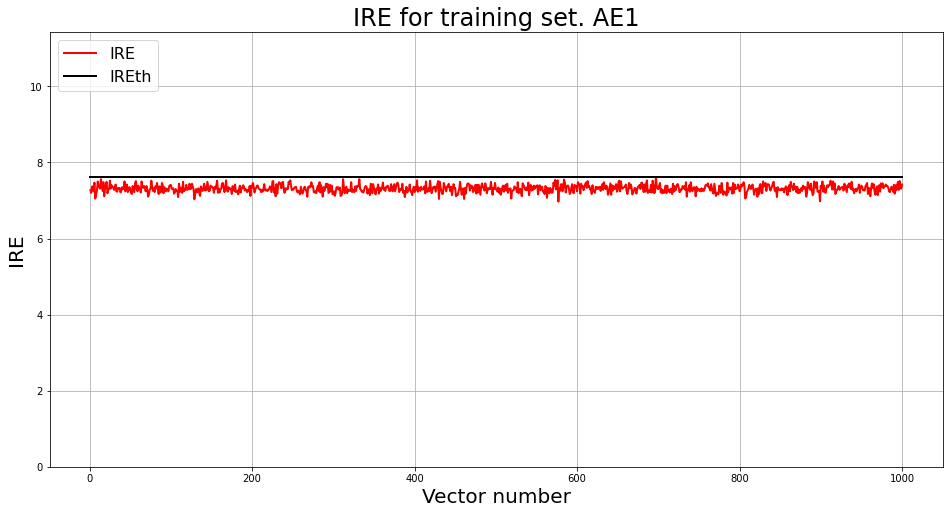

Порог ошибки реконструкции: 7.62


In [ ]:
# Построение графика ошибки реконструкции для AE1
lib.ire_plot('training', IRE1, IREth1, 'AE1')
print('Порог ошибки реконструкции:', IREth1)

In [ ]:
# обучение AE2
ae2_trained, IRE2, IREth2 = lib.create_fit_save_ae(
    data,'out/AE2.h5','out/AE2_ire_th.txt', 3700, True, patience)

Выходные данные были обрезаны до нескольких последних строк (5000).
1/1 [==============================] - 0s 7ms/step - loss: 7.4393
Epoch 1203/3700
1/1 [==============================] - 0s 7ms/step - loss: 7.4250
Epoch 1204/3700
1/1 [==============================] - 0s 10ms/step - loss: 7.4107
Epoch 1205/3700
1/1 [==============================] - 0s 9ms/step - loss: 7.3964
Epoch 1206/3700
1/1 [==============================] - 0s 9ms/step - loss: 7.3822
Epoch 1207/3700
1/1 [==============================] - 0s 10ms/step - loss: 7.3679
Epoch 1208/3700
1/1 [==============================] - 0s 9ms/step - loss: 7.3537
Epoch 1209/3700
1/1 [==============================] - 0s 9ms/step - loss: 7.3395
Epoch 1210/3700
1/1 [==============================] - 0s 11ms/step - loss: 7.3253
Epoch 1211/3700
1/1 [==============================] - 0s 9ms/step - loss: 7.3112
Epoch 1212/3700
1/1 [==============================] - 0s 9ms/step - loss: 7.2971
Epoch 1213/3700
1/1 [======================

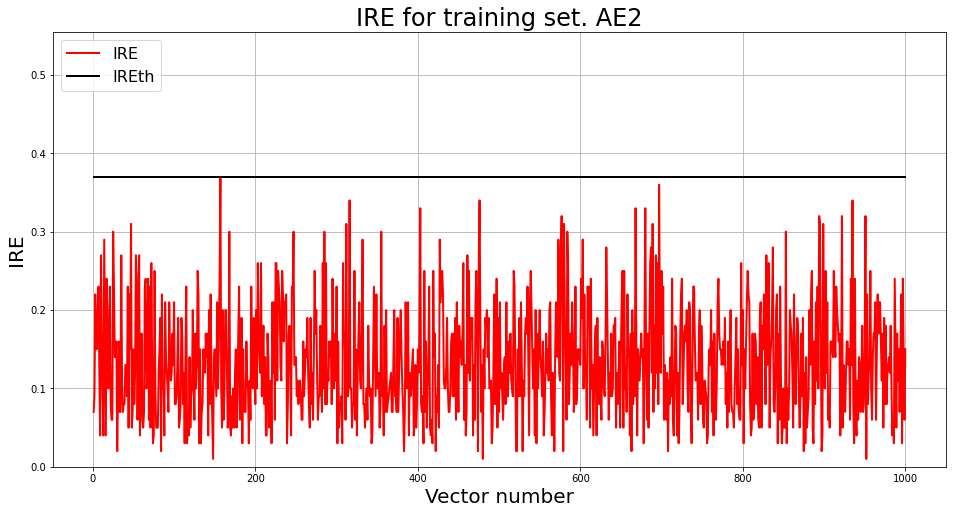

Порог ошибки реконструкции: 0.37


In [ ]:
# Построение графика ошибки реконструкции для AE2
lib.ire_plot('training', IRE2, IREth2, 'AE2')
print('Порог ошибки реконструкции:', IREth2)

232/232 [==============================] - 0s 2ms/step


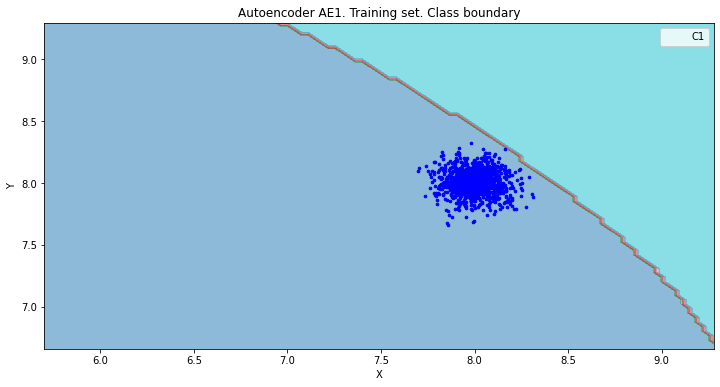

amount:  19
amount_ae:  303


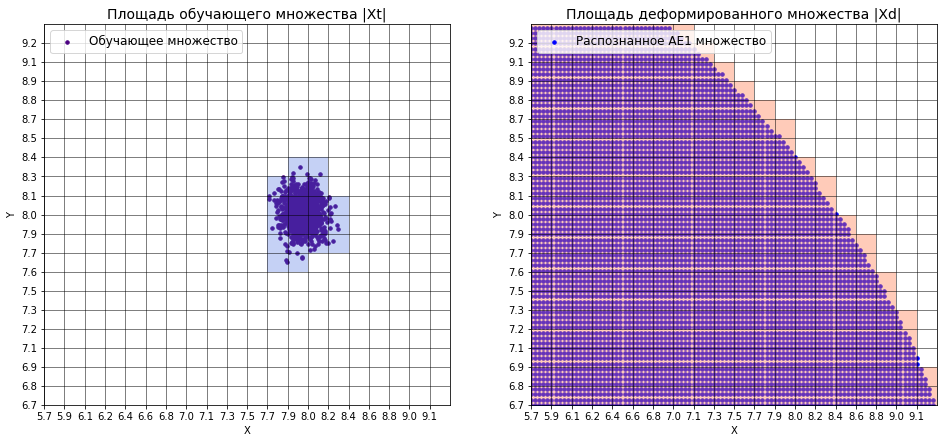

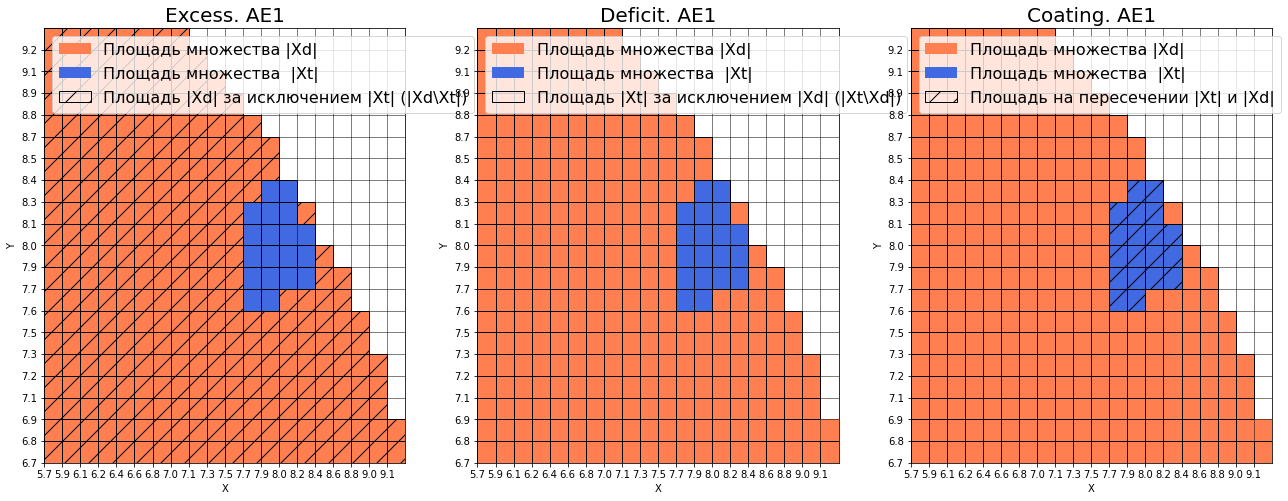


Оценка качества AE1
IDEAL = 0. Excess:  14.947368421052632
IDEAL = 0. Deficit:  0.0
IDEAL = 1. Coating:  1.0
summa:  1.0
IDEAL = 1. Extrapolation precision (Approx):  0.0627062706270627




In [ ]:
# построение областей покрытия и границ классов для AE1
# расчет характеристик качества обучения для AE1
numb_square = 20
xx, yy, Z1 = lib.square_calc(numb_square, data, ae1_trained, IREth1, '1', True)

Деформированная область, построенная автокодировщиком AE1, очень обширна. В нее могут попасть точки, которые далеки от обучающего множества. Значения показателей качества EDCA сильно отличаются от идеальных значений, поэтому такой автокодировщик непригоден для качественного обнаружения аномалий.

232/232 [==============================] - 1s 2ms/step


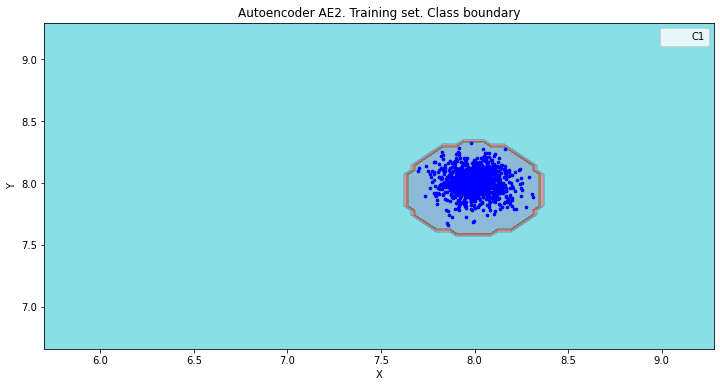

amount:  19
amount_ae:  27


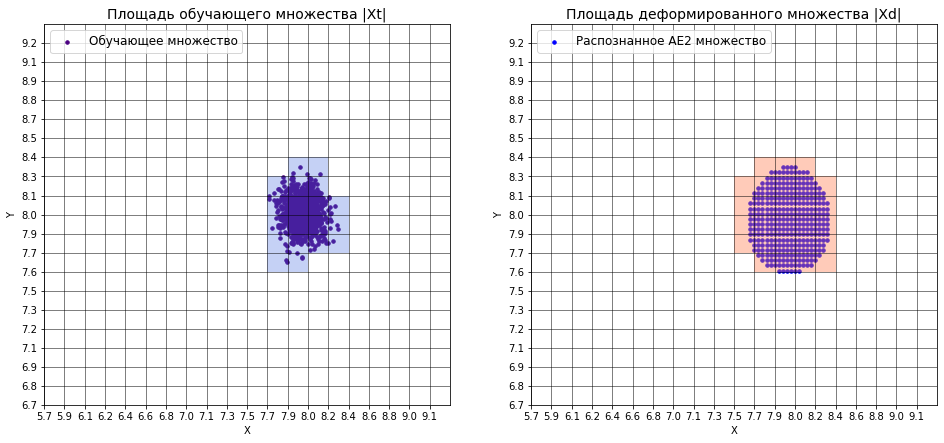

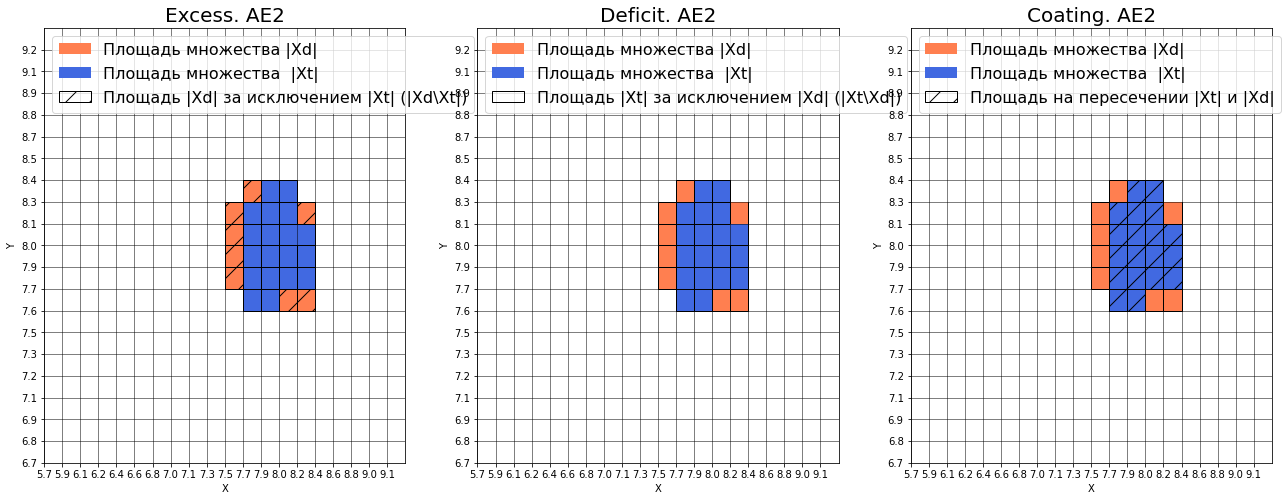


Оценка качества AE2
IDEAL = 0. Excess:  0.42105263157894735
IDEAL = 0. Deficit:  0.0
IDEAL = 1. Coating:  1.0
summa:  1.0
IDEAL = 1. Extrapolation precision (Approx):  0.7037037037037037




In [ ]:
# построение областей покрытия и границ классов для AE2
# расчет характеристик качества обучения для AE2
xx, yy, Z2 = lib.square_calc(numb_square, data, ae2_trained, IREth2, '2', True)

Деформированная область, построенная автокодировщиком AE2,  практически соответствует области обучающих данных. То есть, модель достаточно точно их аппроксимирует. В этом также можно убедиться по рассчитанным показателям EDCA. Полученные значения близки к идеальным значениям. Из вышесказанного следует, что такой автокодировщик пригоден для качественного обнаружения аномалий.

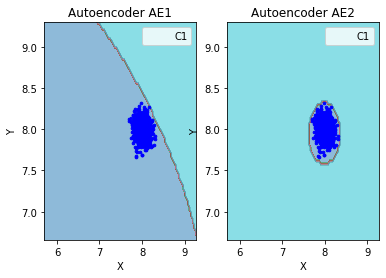

In [ ]:
# сравнение характеристик качества обучения и областей аппроксимации 
lib.plot2in1(data, xx, yy, Z1, Z2)

In [ ]:
# генерация тестовых данных
import random
try:
  with open('data_test.txt','w') as file:
    for i in [(random.uniform(6, 8), random.uniform(7, 8)) for i in range(10)]:
      file.write(str(i[0]) + ' ' + str(i[1]) + '\n')
except:
  print('Error')

In [ ]:
# загрузка тестового набора
data_test = np.loadtxt('data_test.txt', dtype=float)

1/1 [==============================] - 0s 19ms/step
Аномалий не обнаружено


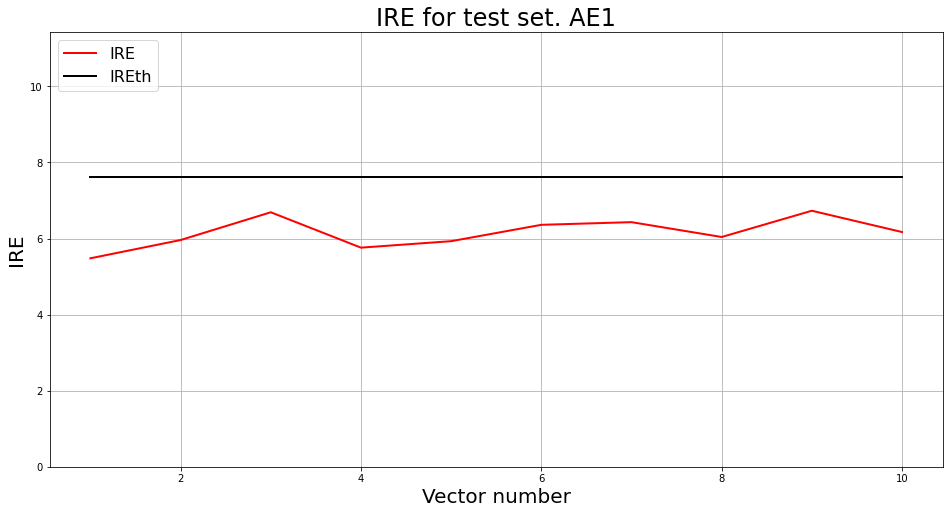

In [ ]:
# тестирование АE1
predicted_labels1, ire1 = lib.predict_ae(ae1_trained, data_test, IREth1)
lib.anomaly_detection_ae(predicted_labels1, ire1, IREth1)
lib.ire_plot('test', ire1, IREth1, 'AE1')

1/1 [==============================] - 0s 19ms/step

i         Labels    IRE       IREth     
0         [1.]      [1.95]    0.37      
1         [1.]      [1.4]     0.37      
2         [1.]      [0.83]    0.37      
3         [1.]      [1.75]    0.37      
4         [1.]      [1.56]    0.37      
5         [1.]      [1.38]    0.37      
6         [1.]      [0.88]    0.37      
7         [1.]      [1.6]     0.37      
8         [1.]      [0.56]    0.37      
9         [1.]      [1.5]     0.37      
Обнаружено  10.0  аномалий


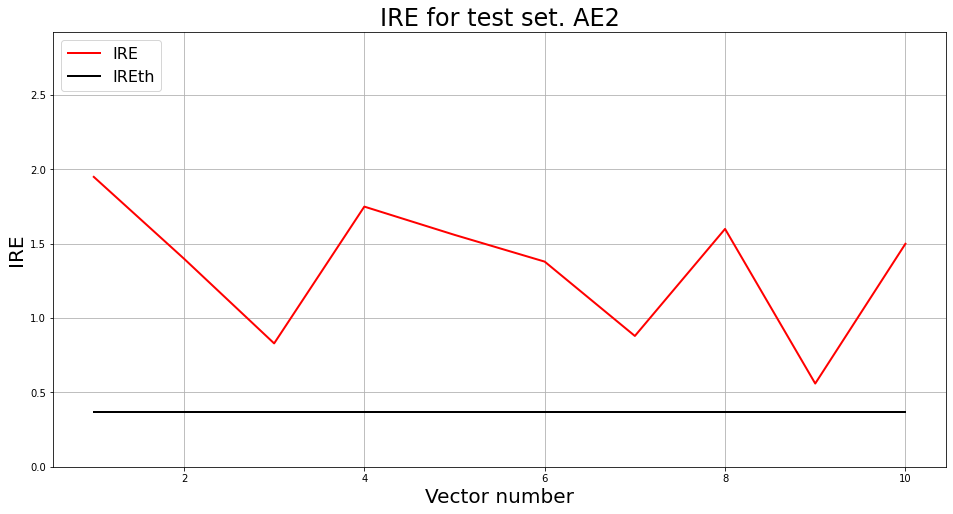

In [ ]:
# тестирование АE2
predicted_labels2, ire2 = lib.predict_ae(ae2_trained, data_test, IREth2)
lib.anomaly_detection_ae(predicted_labels2, ire2, IREth2)
lib.ire_plot('test', ire2, IREth2, 'AE2')

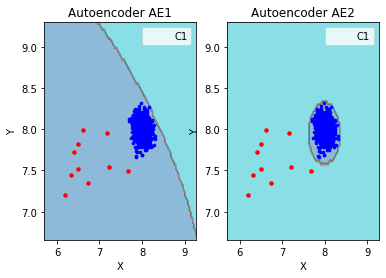

In [ ]:
# построение областей аппроксимации и точек тестового набора
lib.plot2in1_anomaly(data, xx, yy, Z1, Z2, data_test)

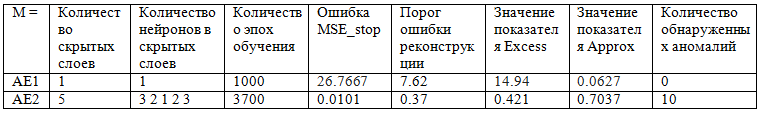

**Выводы:**   
Данные для обучения представляют из себя двумерный набор, состоящий из одного класса.  
Для создания подходящей модели автокодировщика потребуется несколько скрытых слоев с небольшим количеством нейронов в каждом.  
При обучении автокодировщика на данных, которые распределены с центром в точке 8, потребуется около 3700 эпох.  
Ошибка MSE_stop должна быть не меньше 0,01, чтобы не возникло переобучение.
Порог ошибки реконструкции должен быть как можно меньше.  
Характеристики качества обучения EDCA должны быть близки к идеальным.


### Задание 2

In [ ]:
# загрузка выборки
train = np.loadtxt('WBC_train.txt', dtype=float)
test = np.loadtxt('WBC_test.txt', dtype=float)

In [ ]:
# вывод данных и размерности
print('Исходные тренировочные данные:', train, sep='\n')
print('Исходные тестовые данные:', test, sep='\n')
print('Размерность тренировочных данных:', train.shape)
print('Размерность тестовых данных:', test.shape)

Исходные тренировочные данные:
[[3.1042643e-01 1.5725397e-01 3.0177597e-01 ... 4.4261168e-01
  2.7833629e-01 1.1511216e-01]
 [2.8865540e-01 2.0290835e-01 2.8912998e-01 ... 2.5027491e-01
  3.1914055e-01 1.7571822e-01]
 [1.1940934e-01 9.2323301e-02 1.1436666e-01 ... 2.1398625e-01
  1.7445299e-01 1.4882592e-01]
 ...
 [3.3456387e-01 5.8978695e-01 3.2886463e-01 ... 3.6013746e-01
  1.3502858e-01 1.8476978e-01]
 [1.9967817e-01 6.6486304e-01 1.8575081e-01 ... 0.0000000e+00
  1.9712202e-04 2.6301981e-02]
 [3.6868759e-02 5.0152181e-01 2.8539838e-02 ... 0.0000000e+00
  2.5744136e-01 1.0068215e-01]]
Исходные тестовые данные:
[[0.18784609 0.3936422  0.19425057 0.09654295 0.632572   0.31415251
  0.24461106 0.28175944 0.42171717 0.3946925  0.04530147 0.23598833
  0.05018141 0.01899148 0.21589557 0.11557064 0.0655303  0.19643872
  0.08003602 0.07411246 0.17467094 0.62153518 0.18332586 0.08081007
  0.79066235 0.23528442 0.32132588 0.48934708 0.2757737  0.26905418]
 [0.71129727 0.41224214 0.71460162 0.5

In [ ]:
# обучение AE3
import time
patience = 25000
start = time.time()
ae3_trained, IRE3, IREth3 = lib.create_fit_save_ae(train,'out/AE3.h5','out/AE3_ire_th.txt', 
50000, True, patience)
stop = time.time()
print(f'Время обучения: {round(stop-start, 2)} сек')

Выходные данные были обрезаны до нескольких последних строк (5000).
1/1 [==============================] - 0s 14ms/step - loss: 1.7258e-04
Epoch 45443/50000
1/1 [==============================] - 0s 13ms/step - loss: 1.7287e-04
Epoch 45444/50000
1/1 [==============================] - 0s 13ms/step - loss: 1.7334e-04
Epoch 45445/50000
1/1 [==============================] - 0s 16ms/step - loss: 1.7396e-04
Epoch 45446/50000
1/1 [==============================] - 0s 20ms/step - loss: 1.7463e-04
Epoch 45447/50000
1/1 [==============================] - 0s 18ms/step - loss: 1.7528e-04
Epoch 45448/50000
1/1 [==============================] - 0s 26ms/step - loss: 1.7573e-04
Epoch 45449/50000
1/1 [==============================] - 0s 22ms/step - loss: 1.7594e-04
Epoch 45450/50000
1/1 [==============================] - 0s 20ms/step - loss: 1.7580e-04
Epoch 45451/50000
1/1 [==============================] - 0s 18ms/step - loss: 1.7540e-04
Epoch 45452/50000
1/1 [==============================] - 0s 

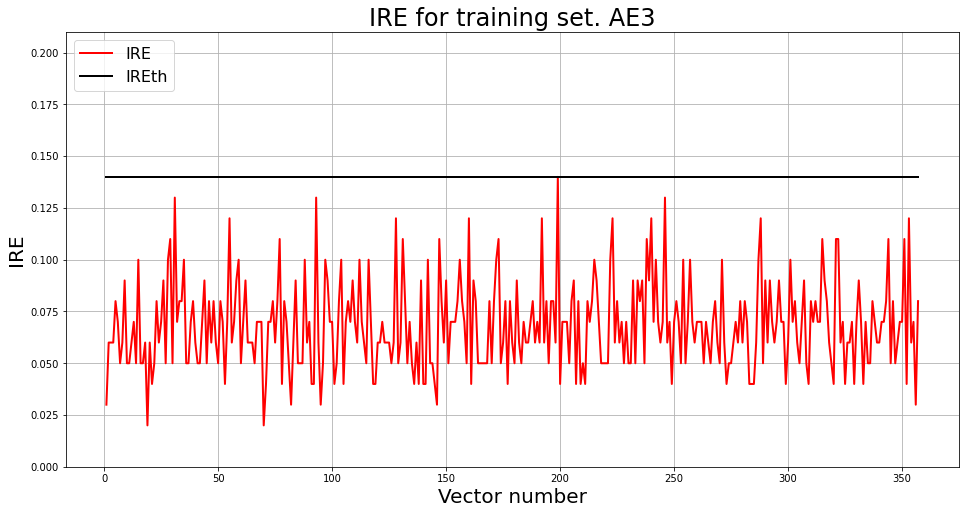

In [ ]:
# Построение графика ошибки реконструкции для AE3
lib.ire_plot('training', IRE3, IREth3, 'AE3')

По виду графика можно сказать, что значительных выбросов не наблюдалось и порог обнаружения аномалий невелик, из чего следует, что автокодировщик AE3 пригоден для качественного обнаружения аномалий.

1/1 [==============================] - 0s 25ms/step

i         Labels    IRE       IREth     
0         [1.]      [0.16]    0.14      
1         [1.]      [0.93]    0.14      
2         [1.]      [0.16]    0.14      
3         [1.]      [0.32]    0.14      
4         [1.]      [0.59]    0.14      
5         [1.]      [0.77]    0.14      
6         [1.]      [0.31]    0.14      
7         [1.]      [1.04]    0.14      
8         [1.]      [0.15]    0.14      
9         [1.]      [0.4]     0.14      
10        [1.]      [0.37]    0.14      
11        [1.]      [0.85]    0.14      
12        [0.]      [0.11]    0.14      
13        [1.]      [0.35]    0.14      
14        [1.]      [0.28]    0.14      
15        [1.]      [0.7]     0.14      
16        [1.]      [0.31]    0.14      
17        [1.]      [0.16]    0.14      
18        [1.]      [1.28]    0.14      
19        [1.]      [1.06]    0.14      
20        [1.]      [0.18]    0.14      
Обнаружено  20.0  аномалий


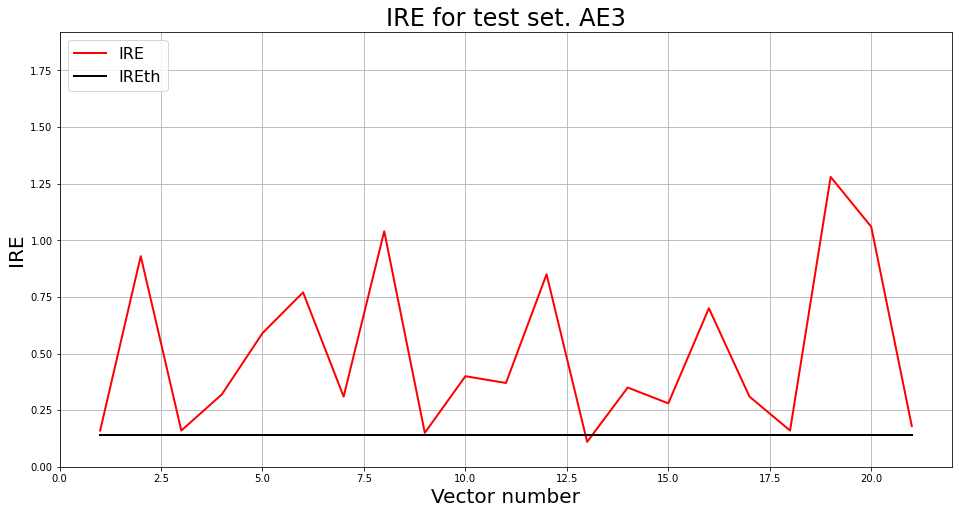

In [ ]:
predicted_labels3, ire3 = lib.predict_ae(ae3_trained, test, IREth3)
lib.anomaly_detection_ae(predicted_labels3, ire3, IREth3)
lib.ire_plot('test', ire3, IREth3, 'AE3')

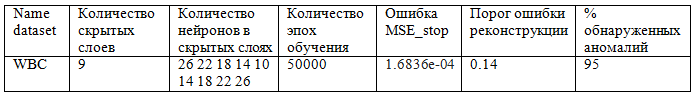

**Выводы:**  
Данные для обучения имеют 30 признаков и представляют из себя единый класс.
Для создания подходящей модели автокодировщика потребуется не менее 9 скрытых слоев. При попытках сделать меньшее количество скрытых слоев значительно терялось качество обучения.  
Количество эпох обучения можно снизить относительно рекомендуемого количества, качества обучения от этого не потеряется.  
При всех попытках ошибка обучения MSE_stop останавливалась на значениях порядка 0,0001.  
Порог ошибки реконструкции должен быть как можно меньше.  
